# **DATA LOADING**

In [19]:
import json
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load in data from a jsonl file
file_path = 'Digital_Music.jsonl'
with open(file_path, 'r') as file:
    data = [json.loads(line) for line in file]

data[:5]

[{'rating': 5.0,
  'title': 'Nice',
  'text': 'If i had a dollar for how many times I have played this cd and how many times I have asked Alexa to play it, I would be rich. Love this singer along with the Black Pumas. Finding a lot of new music that I like a lot on amazon. Try new things.',
  'images': [],
  'asin': 'B004RQ2IRG',
  'parent_asin': 'B004RQ2IRG',
  'user_id': 'AFUOYIZBU3MTBOLYKOJE5Z35MBDA',
  'timestamp': 1618972613292,
  'helpful_vote': 0,
  'verified_purchase': True},
 {'rating': 5.0,
  'title': 'Excellent',
  'text': 'awesome sound - cant wait to see them in person - always miss them when they are in town !',
  'images': [],
  'asin': 'B0026UZEI0',
  'parent_asin': 'B0026UZEI0',
  'user_id': 'AHGAOIZVODNHYMNCBV4DECZH42UQ',
  'timestamp': 1308167525000,
  'helpful_vote': 0,
  'verified_purchase': True},
 {'rating': 5.0,
  'title': 'Great service',
  'text': 'This is a great cd. Good music and plays well. Seller responded back very quicky and  received it within 3 days',

In [3]:
# convert file to csv
csv_file_path = 'Digital_Music.csv'

fieldnames = data[0].keys()
with open(csv_file_path, 'w', newline='') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    writer.writerows(data)

print("Data has been successfully converted to CSV.")

Data has been successfully converted to CSV.


In [4]:
# load the csv file
df = pd.read_csv("Digital_Music.csv")
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Nice,If i had a dollar for how many times I have pl...,[],B004RQ2IRG,B004RQ2IRG,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,1618972613292,0,True
1,5.0,Excellent,awesome sound - cant wait to see them in perso...,[],B0026UZEI0,B0026UZEI0,AHGAOIZVODNHYMNCBV4DECZH42UQ,1308167525000,0,True
2,5.0,Great service,This is a great cd. Good music and plays well....,[],B0055JSYHC,B0055JSYHC,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,1615838793006,0,True
3,1.0,No good,"These are not real German singers, they have a...",[],B000F9SMUQ,B000F9SMUQ,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,1405219741000,0,True
4,3.0,"Cool concept, so-so execution...",I first heard this playing in a Nagoya shop an...,[],B0049D1WVK,B0049D1WVK,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,1309029595000,0,False


# **DATA CLEANING**



In [5]:
# number of observations and summary statistics
num_observations = df.shape[0]
df.describe(include='all')

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
count,130434.000000,130406,130399,130434,130434,130434,130434,1.304340e+05,130434.000000,130434
unique,NaN,86009,118640,3269,70519,70511,100952,NaN,NaN,2
top,NaN,Five Stars,Great,[],B00003CXKT,B00003CXKT,AGAFM74L2RIJ5O36NNYH4Z5ISQNQ,NaN,NaN,True
freq,NaN,17294,400,127100,398,398,341,NaN,NaN,96033
mean,4.532837,NaN,NaN,NaN,NaN,NaN,NaN,1.469880e+12,1.045050,NaN
std,1.027994,NaN,NaN,NaN,NaN,NaN,NaN,1.369730e+11,3.485248,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.745575e+11,0.000000,NaN
25%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.400349e+12,0.000000,NaN
50%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.475705e+12,0.000000,NaN
75%,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.573689e+12,1.000000,NaN


In [10]:
# check for missing data
df.isnull().sum()

,0
rating,0
title,28
text,35
images,0
asin,0
parent_asin,0
user_id,0
timestamp,0
helpful_vote,0
verified_purchase,0


In [9]:
df.dtypes

,0
rating,float64
title,object
text,object
images,object
asin,object
parent_asin,object
user_id,object
timestamp,int64
helpful_vote,int64
verified_purchase,bool


In [11]:
unique_values = df.nunique()

for column, unique_count in unique_values.items():
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'rating' has 5 unique values.
Column 'title' has 86009 unique values.
Column 'text' has 118640 unique values.
Column 'images' has 3269 unique values.
Column 'asin' has 70519 unique values.
Column 'parent_asin' has 70511 unique values.
Column 'user_id' has 100952 unique values.
Column 'timestamp' has 128745 unique values.
Column 'helpful_vote' has 96 unique values.
Column 'verified_purchase' has 2 unique values.


In [15]:
empty_title_or_text = df[(df['title'].isnull()) | (df['text'].isnull())]
empty_title_or_text

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
3514,5.0,NaN,Beautiful song,[],B07KC42LCV,B07KC42LCV,AG57MN3I7PVZP2GCQSVG77KHYSCA,1558879851627,0,True
11585,5.0,NaN,listen too,[],B07ZGL8MP6,B07ZGL8MP6,AGJATVTSGTPHR5SYDZZV3TKQTXBQ,1597784991788,0,True
11586,5.0,NaN,listening to,[],B07QPHD1FH,B07QPHD1FH,AGJATVTSGTPHR5SYDZZV3TKQTXBQ,1597503726341,0,True
12676,3.0,I like it,NaN,[],B0008JFQ8O,B0008JFQ8O,AGCJI4FXNAQJDCZS5FISCP6NKXRA,1627849943672,0,True
12677,3.0,I like it,NaN,[],B001E4CZGI,B001E4CZGI,AGCJI4FXNAQJDCZS5FISCP6NKXRA,1627849896522,0,True
15588,5.0,Five Stars,NaN,[],B00PTBZQ6S,B00PTBZQ6S,AEUQYMN7IVESRXCIZM4Q5QVNVHEA,1487107665000,0,True
20784,5.0,Rating,NaN,[],B09PGTMG8T,B09PGTMG8T,AG23W5SN5G4MDVFNEULOCQ2REUQA,1671891381419,0,True
22838,5.0,NaN,I am really enjoying my new cd.,[],B000EY5FAM,B000EY5FAM,AFUWOIDOULJLDGQQ33ZHQRDYYD2Q,1543353219723,0,True
25309,5.0,the whole CD is great listening,NaN,[],B01JT71BVQ,B01JT71BVQ,AGBOXS57LTAWM6B7UVIHSMMABQJQ,1601750267637,0,True
27022,5.0,Five Stars,NaN,[],B00PDNS8F8,B00PDNS8F8,AH2BVFJD6XD22W3STSD2W2B3ZJZQ,1495002483000,0,True


In [16]:
# DATA CLEANING: this is to fill in empty title or text if the other is filled in
df['title'] = df.apply(lambda row: row['text'] if pd.isnull(row['title']) and not pd.isnull(row['text']) else row['title'], axis=1)
df['text'] = df.apply(lambda row: row['title'] if pd.isnull(row['text']) and not pd.isnull(row['title']) else row['text'], axis=1)

In [17]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

In [18]:
df

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Nice,If i had a dollar for how many times I have pl...,[],B004RQ2IRG,B004RQ2IRG,AFUOYIZBU3MTBOLYKOJE5Z35MBDA,2021-04-21 02:36:53.292,0,True
1,5.0,Excellent,awesome sound - cant wait to see them in perso...,[],B0026UZEI0,B0026UZEI0,AHGAOIZVODNHYMNCBV4DECZH42UQ,2011-06-15 19:52:05.000,0,True
2,5.0,Great service,This is a great cd. Good music and plays well....,[],B0055JSYHC,B0055JSYHC,AFGEM6BXCYHUILEOA3P2ZYBEF2TA,2021-03-15 20:06:33.006,0,True
3,1.0,No good,"These are not real German singers, they have a...",[],B000F9SMUQ,B000F9SMUQ,AH3OG6QD6EDJGZRVCFKV4B66VWNQ,2014-07-13 02:49:01.000,0,True
4,3.0,"Cool concept, so-so execution...",I first heard this playing in a Nagoya shop an...,[],B0049D1WVK,B0049D1WVK,AFW2PDT3AMT4X3PYQG7FJZH5FXFA,2011-06-25 19:19:55.000,0,False
...,...,...,...,...,...,...,...,...,...,...
130429,5.0,BTS Rules the World,BTS order exceeded my expectations as always,[],B089NZYT26,B089NZYT26,AF5NJAIT4LBULU65RF7VHEPCSBGQ,2022-01-03 14:55:21.610,2,True
130430,5.0,Love it!,"received the album in good condition, and ther...",[],B07D66LF8J,B07D66LF8J,AGNANZSHBC7DCUQHHSYRUMSNCUZA,2020-01-20 08:56:37.233,0,True
130431,5.0,Gran artista y con mariachi se escucha muy bien,Me encantó este Cd,[],B07WQJZ4XQ,B07WQJZ4XQ,AHOWFPVORG6KHHI3P5QFIVQZ5XYA,2019-12-13 23:49:01.163,1,True
130432,1.0,The Nasal and Winded.,A pathetic attempt at something. I can't ident...,[],B000NP1OLQ,B000NP1OLQ,AEA5DJGQPPBEGX4ZQJPXYVG7VITQ,2015-06-07 01:52:00.000,26,False


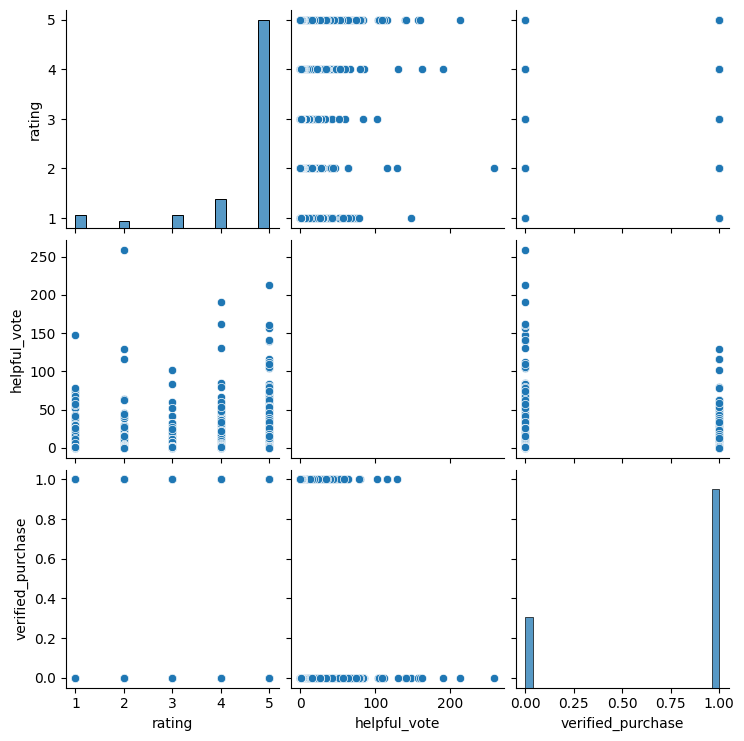

In [20]:
numerical_boolean_columns = df.select_dtypes(include=['number', 'bool']).columns
sns.pairplot(df[numerical_boolean_columns])
plt.show()